## WeatherPy
#### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
#### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query = f"{url}appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query + city

    weather_response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = weather_response["main"]["temp_max"]
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | domoni
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | boca do acre
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | pitea
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mayo
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | havelock
Processing Record 17 of Set 1 | margate
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | tekax
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | vaini
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,17.11,66,88,9.16,ZA,1674552633
1,domoni,-12.2569,44.5319,27.97,78,100,7.12,KM,1674552829
2,east london,-33.0153,27.9116,27.52,57,0,10.29,ZA,1674552830
3,boca do acre,-8.7522,-67.3978,21.73,99,99,0.94,BR,1674552831
4,dikson,73.5069,80.5464,-20.93,96,100,16.44,RU,1674552832


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.11,66,88,9.16,ZA,1674552633
1,domoni,-12.2569,44.5319,27.97,78,100,7.12,KM,1674552829
2,east london,-33.0153,27.9116,27.52,57,0,10.29,ZA,1674552830
3,boca do acre,-8.7522,-67.3978,21.73,99,99,0.94,BR,1674552831
4,dikson,73.5069,80.5464,-20.93,96,100,16.44,RU,1674552832


## Create the Scatter Plots Requested
#### Latitude vs Temperature

In [8]:
date = pd.to_datetime('now').strftime("%d/%m/%Y")

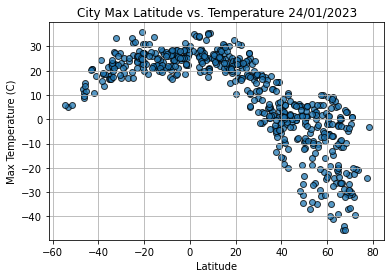

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75,edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
label = f"City Max Latitude vs. Temperature {date}"
plt.title(label=label)
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs Humidity

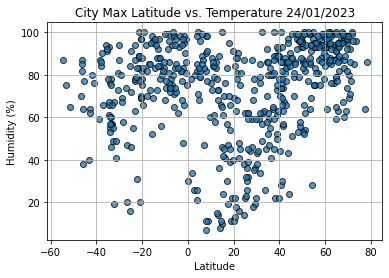

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75,edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
label = f"City Max Latitude vs. Temperature {date}"
plt.title(label=label)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

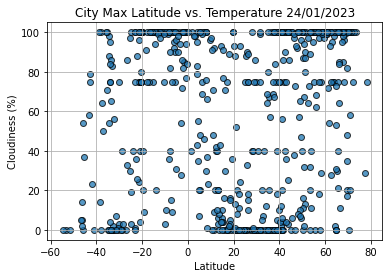

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75,edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
label = f"City Max Latitude vs. Temperature {date}"
plt.title(label=label)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

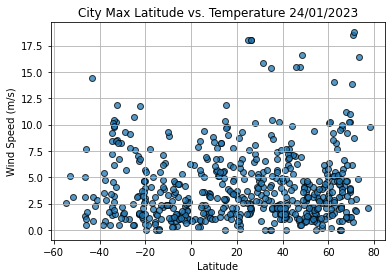

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75,edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
label = f"City Max Latitude vs. Temperature {date}"
plt.title(label=label)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Computet Linear Regression for Each Relationship

In [62]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_val, y_val, y_label, title):
    slope, intercept, r, p, se = stats.linregress(x_val, y_val)

    regress_val = x_val * slope + intercept
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # plot
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_val, "r-")
    plt.annotate(line_eq,xy=(min(x_val), min(y_val)),fontsize=10,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-values is: {r}")


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,dikson,73.5069,80.5464,-20.93,96,100,16.44,RU,1674552832
5,pitea,65.3172,21.4794,-1.95,88,30,2.18,SE,1674552832
6,thompson,55.7435,-97.8558,-34.91,75,0,1.03,CA,1674552833
8,mayo,38.8876,-76.5119,3.40,73,0,4.63,US,1674552834
9,tiksi,71.6872,128.8694,-31.97,100,100,1.87,RU,1674552835


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,17.11,66,88,9.16,ZA,1674552633
1,domoni,-12.2569,44.5319,27.97,78,100,7.12,KM,1674552829
2,east london,-33.0153,27.9116,27.52,57,0,10.29,ZA,1674552830
3,boca do acre,-8.7522,-67.3978,21.73,99,99,0.94,BR,1674552831
7,punta arenas,-53.1500,-70.9167,5.06,75,0,5.14,CL,1674552362


#### Temperature vs. Latitude Linear Regression Plot

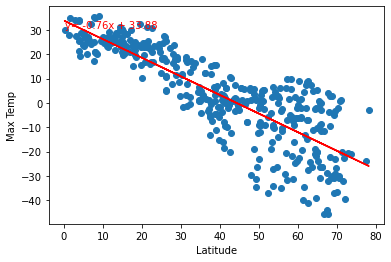

The r-values is: -0.8319757577153242


In [65]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp", "City Latitude vs Max Temperature")